# Optimization Methods MA060002
## Homework 1
By: Darío Slaifstein, PhD-2.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
from numpy import linalg as LNG
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from scipy import optimize

### 1. Optimization problem example
We wish to find the  height $h$ and radius $r$ that minimze the surface area $S$ of the metal to manufacture a circular cylindrical can of volume $V$. Thus the ruling equations are:

\begin{equation}
S = 2 S_1 + S_2
\end{equation}
\begin{equation}
V=S_1.h
\end{equation}
\begin{equation}
S_1=\pi . r^2
\end{equation}
\begin{equation}
S_2=2\pi.r.h
\end{equation}

With $S_1$ being the surface of the top and bottom faces and $S_2$ the remaining surface. To solve the problem, we first clear out $h$ in terms of $r$ and substitute that into the equation of the total surface $S$.

\begin{equation}
h=\frac{V}{2\pi.r^2}
\end{equation}
\begin{equation}
S=2.\pi.r^2+\frac{V}{r}
\end{equation}

We then minimize the surface $S$ against $r$ as:
\begin{equation}
\frac{dS}{dr}=0
\end{equation}
\begin{equation}
0=2\pi.r-\frac{V}{r^2}
\end{equation}
\begin{equation}
2\pi.r=\frac{V}{r^2}
\end{equation}
\begin{equation}
r^3=\frac{V}{2\pi}
\end{equation}

Finally the radius $r$ and height $h$ are:

\begin{equation}
r=\sqrt[3]\frac{V}{2\pi}
\end{equation}
\begin{equation}
h=(\frac{V}{2\pi})^{5/3}
\end{equation}

### 2. Optimally conditions
The optimally conditions for $f(x_1,x_2)$ are:
\begin{equation}
 \nabla f(x^*) = 0
\end{equation}
\begin{equation}
 det(\nabla^{2} f(x^*)) > 0
\end{equation}
Hence we need $a$ and $b$ to fulfill them.
In our case $f$ is the Bird function:
\begin{equation}
 f(x_1,x_2) = \frac{3}{2}(x_1^2+x_2^2)+(1+a)x_1x_2-x_1-x_2+b
\end{equation}

First of all, $b$ can be whatever it want because its just an offset of the function $f$.
Hence, the conditions for optimally solving $f$ put constraints into a. The first condition comes as:
\begin{equation}
    \frac{\partial f}{\partial x_1}=3x_1+(1+a).x_2-1=0
\end{equation}
\begin{equation}
    \frac{\partial f}{\partial x_2}=3x_2+(1+a).x_1-1=0
\end{equation}
\begin{equation}
 3x_2+(1+a).x_1=3x_1+(1+a).x_2
\end{equation}
\begin{equation}
 (a-2).x_1=(a-2).x_2 \rightarrow x_1=x_2
\end{equation}
which gives no information regarding $a$.

The second condition regarding the determinant of the Hessian goes as:
\begin{equation}
    \frac{\partial^2 f}{\partial x_1^2}=\frac{\partial^2 f}{\partial x_1^2}=3
\end{equation}
\begin{equation}
    \frac{\partial^2 f}{\partial x_1.x_2}=\frac{\partial^2 f}{\partial x_2.x_1}=1+a
\end{equation}

\begin{equation}
    det(\nabla^2 f)=9-(1+a)^2>0
\end{equation}
\begin{equation}
    (a+4)(a-2)<0
\end{equation}

Hence for the Bird function $f$ to be optimally solved we need $a\ \epsilon\ (-4;2)$

### 3. Nelder-Mead
_3.1_ We need to find the minimum value of the Mishra's Bird function inside the circle of $r=5$ centered in $[5, 5]$
\begin{equation}
f(x,y)=sin(y).e^{(1-cos(x))^2}+cos(x).e^{(1-sin(y))^2}+(x-y)^2
\end{equation}
subject to
\begin{equation}
(x+5)^2+(y+5)^2<25
\end{equation}

to handle this constraint we will define the cost function to be minimized as:
\begin{equation}
   J(x,y)=   \left\{
\begin{array}{ll}
      f(x,y) & (x+5)^2+(y+5)^2<25 \\
      1000.(e^{x+5}+e^{-x-5}+e^{y+5}+e^{-y-5}) & (x+5)^2+(y+5)^2>25 \\
\end{array} 
\right.  
\end{equation}
in this way, both the Nelder-Method and the Coordinate descent will quickly recover from going out of bounds and without getting stack on a horizontal plane.
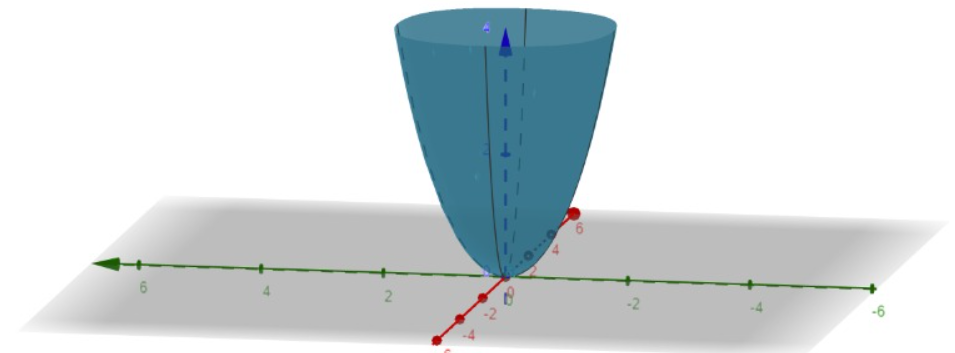
We now define the Bird and Cost functions:

In [2]:
def f(x): # Bird function
    birdFunc=np.sin(x[1])*np.exp(1-np.cos(x[0]))**2+np.cos(x[0])*np.exp(1-np.sin(x[1]))**2+(x[0]-x[1])**2
    return birdFunc

def J(x): # Cost function
    r=(x[0]+5)**2+(x[1]+5)**2
    if r>25:
        costFunc=1000*(np.exp(x[0]-5)+np.exp(-x[0]+5)+np.exp(x[1]-5)+np.exp(-x[1]+5))
    else:
        costFunc=f(x)
    return costFunc

In [3]:
def sorterFun(x1,x2,x3): # sort simplex points depending on f(x) value
    inputs=np.array([x1,x2,x3])
    inFun=np.array([f(x1),f(x2),f(x3)])
    sortFun=np.argsort(inFun)
    outputs=[inputs[i] for i in sortFun]
    return outputs[0],outputs[1],outputs[2]; # from left to right, xl... xc...xh

## Methods for the decision
# Reflection
def reflection(xl,xc,xh,alpha):
    xCG=(xl+xc)/2 # Center of gravity without fl
    xR=xCG+alpha*(xCG-xh) # reflection
    return xR,xCG;

# Expansion
def expansion(xR,xCG,gamma):
    xE=xR+gamma*(xR-xCG) # expanded point
    return xE;

# Contraction
def contraction(xC1,xh,beta):
    xC2=xC1+(1/beta)*(xC1-xh) # contracted point
    return xC2;

# error
def error(xl,xc,xh,f):
    err=np.abs(f(xl)-f(xh)) # distance btw 
    return err;

def nelderMead(x0, f, alpha, gamma, beta, colorSimplex):
    # Sort seed
    xh,xc,xl=sorterFun(x0[0],x0[1],x0[2])
    # Parameters
    i=0 # iterations
    k=3 # oracle calls
    maxIter = 1e4
    # Initialize the outputs
    fxl=[]
    err=[]
    outX = []
    
    while error(xh,xc,xl,f)>tol and k<maxIter:
        i=i+1
        xl,xc,xh=sorterFun(xl,xc,xh)
        xR,xCG=reflection(xl,xc,xh,alpha) # xr: reflection xCg: center of grav.
        
        # Append outputs
        fxl.append(f(xl))
        err.append(error(xl,xc,xh,f)) # list of errors
        outX.append([xl,xc,xh])
        
        if f(xR)<f(xc): # compare reflection vs the second worst vertex
            xE=expansion(xR,xCG,gamma)
            k=k+1
        else:
            xC1=(xCG+xh)/2 # create first contraction vertex
            if f(xC1)<f(xh): # compare first contraction vertex vs xh
                xC2=contraction(xC1,xh,beta)
                if f(xC2)<f(xh):
                    xh=xC2
                    k=k+1
                else:
                    xh=xC1
                    k=k+1
            else:
                xc=xCG
                xh=(xh+xl)/2
                k=k+1
         
        # Plot simplexes
        simplexPts=np.array([xl, xc, xh])
        simplex=Polygon(simplexPts,facecolor='None',edgecolor=colorSimplex)
        ax=plt.gca()
        ax.add_patch(simplex)
    return outX,i,k,err,fxl;

The Bird function looks like:

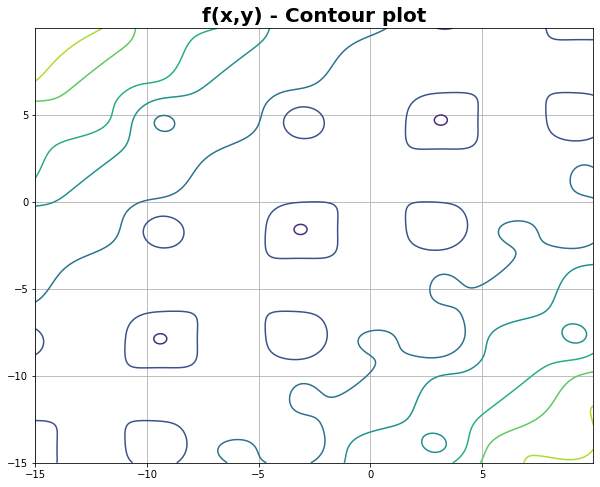

In [4]:
dx=0.01
x=np.arange(-15,10,dx) # x array for grid
y=np.arange(-15,10,dx) # y array for grid
X, Y = np.meshgrid(x, y) # grid

# Bird function
Zbird=f([X,Y])

# generate figure
fig, axis = plt.subplots(figsize=(10,8))
CS=axis.contour(X, Y, Zbird)
axis.set_title('f(x,y) - Contour plot',fontweight='bold', fontsize=20)
plt.grid()

Now we the cost function well defined, we proceed to minimize it:

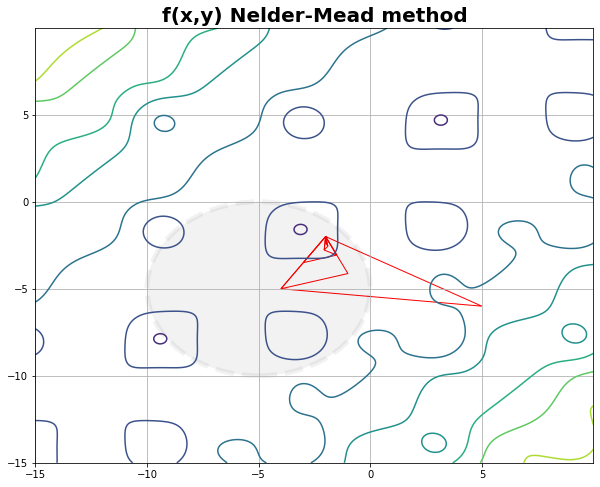

In [5]:
x0 = [[-2, -2],
     [5 , -6],
     [-4, -5]] # initial condition inside the bounds
tol=1e-5 # tolerance for the min

# Parameters for Nelder-Mead
alpha=5
beta=0.5 # smaller than 1
gamma=2 # greater than 1

# generate figure
fig, axis = plt.subplots(figsize=(10,8))
CS=axis.contour(X, Y, Zbird)
axis.set_title('f(x,y) Nelder-Mead method',fontweight='bold', fontsize=20)
plt.grid()

# Plot simplexes
simplexPts=np.array([x0[0], x0[1], x0[2]])
simplex=Polygon(simplexPts,facecolor='None',edgecolor='red')
axis=plt.gca()
axis.add_patch(simplex)

# Optimize
xNM,iNM,kNM,errNM,fxlNM = nelderMead(x0, J, alpha, beta, gamma,'red')

# plot region of convergence
regionConv = plt.Circle((-5, -5), 5, color='k', fill=True, linestyle='--',alpha=0.05, linewidth=5)
axis.add_patch(regionConv)


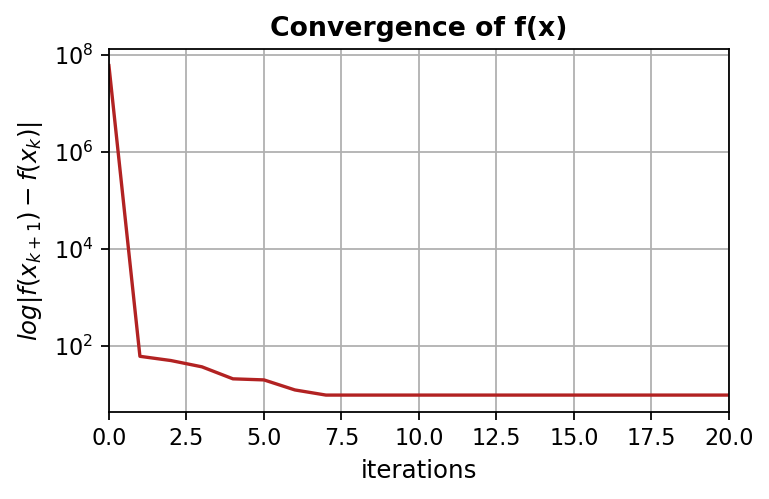

In [6]:
plt.figure(dpi=160, figsize=(5,3))

plt.semilogy(np.linspace(0,iNM, num=iNM), np.array(errNM), color='firebrick')

plt.title('Convergence of f(x)', fontsize=12, fontweight='bold')
plt.ylabel('$log|f(x_{k+1})-f(x_{k})|$', fontsize=11)
plt.xlabel('iterations', fontsize=11)
# plt.ylim([17, 17.5])
plt.xlim([0, 20])

plt.grid()
plt.show()

_3.2_ We now analyze the performance of the algorithm with different seeds:

The convergence point $x^*=$= [array([-3.13598633, -0.96044922]), array([-2.953125, -0.96875 ]), array([-3.07617188, -0.92578125])] with a seed simplex of $x^0=$ [[0, 0], [0, -2], [-7, -1]]


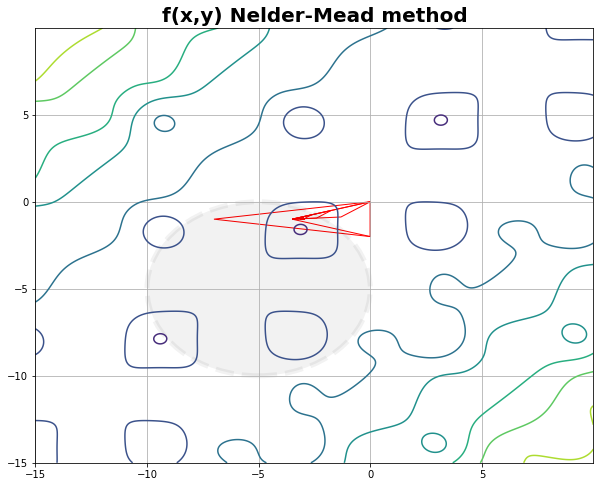

In [7]:
x0 = [[0, 0],
     [0 , -2],
     [-7, -1]] # initial condition inside the bounds

# generate figure
fig, axis = plt.subplots(figsize=(10,8))
CS=axis.contour(X, Y, Zbird)
axis.set_title('f(x,y) Nelder-Mead method',fontweight='bold', fontsize=20)
plt.grid()

# Plot simplexes
simplexPts=np.array([x0[0], x0[1], x0[2]])
simplex=Polygon(simplexPts,facecolor='None',edgecolor='red')
axis=plt.gca()
axis.add_patch(simplex)

# Optimize
xNM,iNM,kNM,errNM,fxlNM = nelderMead(x0, J, alpha, beta, gamma,'red')

# plot region of convergence
regionConv = plt.Circle((-5, -5), 5, color='k', fill=True, linestyle='--',alpha=0.05, linewidth=5)
axis.add_patch(regionConv)
print('The convergence point $x^*=$=', xNM[-1], 'with a seed simplex of $x^0=$',x0)

The convergence point $x^*=$= [array([-5.75915527, -5.36499023]), array([-5.77568626, -5.30996323]), array([-5.79371643, -5.30532837])] with a seed simplex of $x^0=$ [[-5, -5], [-8, -5], [-5, -10]]


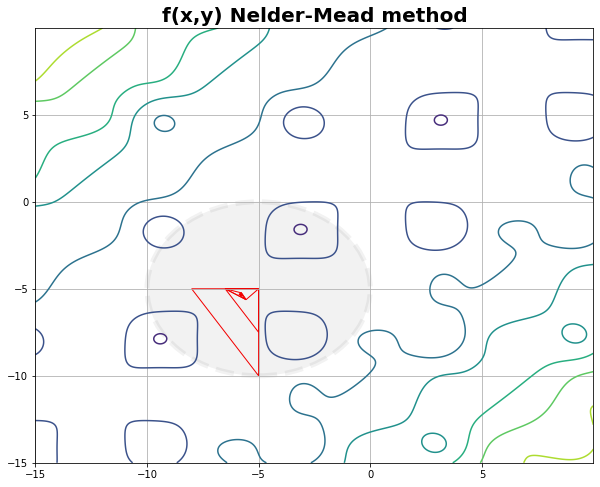

In [8]:
x0 = [[-5, -5],
     [-8 , -5],
     [-5, -10]] # initial condition inside the bounds

# generate figure
fig, axis = plt.subplots(figsize=(10,8))
CS=axis.contour(X, Y, Zbird)
axis.set_title('f(x,y) Nelder-Mead method',fontweight='bold', fontsize=20)
plt.grid()

# Plot simplexes
simplexPts=np.array([x0[0], x0[1], x0[2]])
simplex=Polygon(simplexPts,facecolor='None',edgecolor='red')
axis=plt.gca()
axis.add_patch(simplex)

# Optimize
xNM,iNM,kNM,errNM,fxlNM = nelderMead(x0, J, alpha, beta, gamma,'red')

# plot region of convergence
regionConv = plt.Circle((-5, -5), 5, color='k', fill=True, linestyle='--',alpha=0.05, linewidth=5)
axis.add_patch(regionConv)
print('The convergence point $x^*=$=', xNM[-1], 'with a seed simplex of $x^0=$',x0)

We can observe that our algorithm can handle the inequality constraints due to the constructed cost function $J(x,y)$. Sadly, if the all the points of the initial simplex are in the same/similar equipotential the method gets lost.

_3.2._ Sensibility analysis of $\alpha$, $\beta$, $\gamma$

The convergence point $x^*=$= [array([0, 0]), array([ 0, -2]), array([-7, -1])] with a seed simplex of $x^0=$ [[0, 0], [0, -2], [-7, -1]] for an alpha= 1.0
The convergence point $x^*=$= [array([-3.13598633, -0.96044922]), array([-2.953125, -0.96875 ]), array([-3.07617188, -0.92578125])] with a seed simplex of $x^0=$ [[0, 0], [0, -2], [-7, -1]] for an alpha= 7.0
The convergence point $x^*=$= [array([-3.13598633, -0.96044922]), array([-2.953125, -0.96875 ]), array([-3.07617188, -0.92578125])] with a seed simplex of $x^0=$ [[0, 0], [0, -2], [-7, -1]] for an alpha= 13.0
The convergence point $x^*=$= [array([-3.111766  , -0.96004875]), array([-3.10742382, -0.95996403]), array([-3.1093223 , -0.95990498])] with a seed simplex of $x^0=$ [[0, 0], [0, -2], [-7, -1]] for an alpha= 19.0
The convergence point $x^*=$= [array([-3.111766  , -0.96004875]), array([-3.10742382, -0.95996403]), array([-3.1093223 , -0.95990498])] with a seed simplex of $x^0=$ [[0, 0], [0, -2], [-7, -1]] for an alpha= 25.0


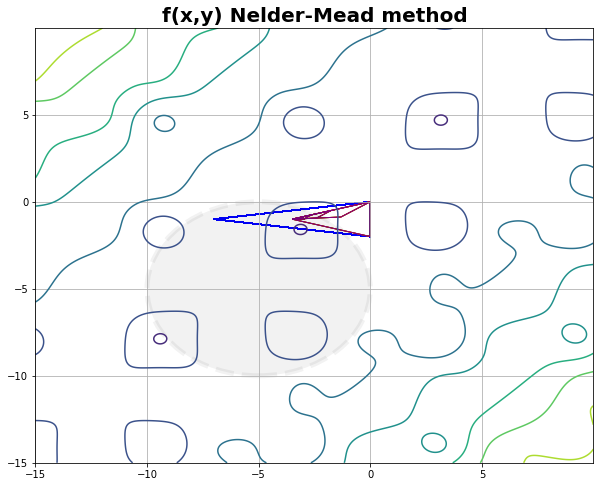

In [9]:
x0 = [[0, 0],
     [0 , -2],
     [-7, -1]] # initial condition inside the bounds


# Define alphas
alpha=np.linspace(1,25,5)
# Define colors
colorSimplex=['blue','orange','green','red','purple']

# generate figure
fig, axis = plt.subplots(figsize=(10,8))
CS=axis.contour(X, Y, Zbird)
axis.set_title('f(x,y) Nelder-Mead method',fontweight='bold', fontsize=20)
plt.grid()

# Plot simplexes
simplexPts=np.array([x0[0], x0[1], x0[2]])
simplex=Polygon(simplexPts,facecolor='None',edgecolor=colorSimplex[0])
axis=plt.gca()
axis.add_patch(simplex)

for ii in range(len(alpha)):
    # Optimize
    xNM,iNM,kNM,errNM,fxlNM = nelderMead(x0, J, alpha[ii], beta, gamma,colorSimplex[ii])
    print('The convergence point $x^*=$=', xNM[-1], 'with a seed simplex of $x^0=$',x0,'for an alpha=',alpha[ii])
# plot region of convergence
regionConv = plt.Circle((-5, -5), 5, color='k', fill=True, linestyle='--',alpha=0.05, linewidth=5)
axis.add_patch(regionConv)

The convergence point $x^*=$= [array([0, 0]), array([ 0, -2]), array([-7, -1])] with a seed simplex of $x^0=$ [[0, 0], [0, -2], [-7, -1]] for a beta= 0.2
The convergence point $x^*=$= [array([0, 0]), array([ 0, -2]), array([-7, -1])] with a seed simplex of $x^0=$ [[0, 0], [0, -2], [-7, -1]] for a beta= 0.4
The convergence point $x^*=$= [array([0, 0]), array([ 0, -2]), array([-7, -1])] with a seed simplex of $x^0=$ [[0, 0], [0, -2], [-7, -1]] for a beta= 0.6000000000000001
The convergence point $x^*=$= [array([0, 0]), array([ 0, -2]), array([-7, -1])] with a seed simplex of $x^0=$ [[0, 0], [0, -2], [-7, -1]] for a beta= 0.8
The convergence point $x^*=$= [array([0, 0]), array([ 0, -2]), array([-7, -1])] with a seed simplex of $x^0=$ [[0, 0], [0, -2], [-7, -1]] for a beta= 1.0


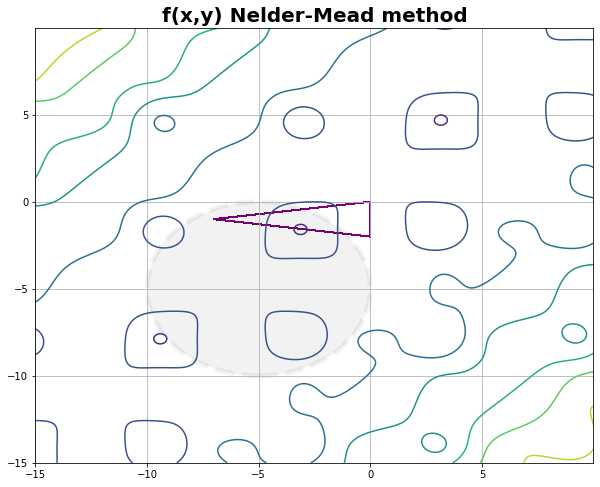

In [10]:
x0 = [[0, 0],
     [0 , -2],
     [-7, -1]] # initial condition inside the bounds

# Define betas
alpha=1
beta=np.linspace(0.2,1,5)
# Define colors
colorSimplex=['blue','orange','green','red','purple']

# generate figure
fig, axis = plt.subplots(figsize=(10,8))
CS=axis.contour(X, Y, Zbird)
axis.set_title('f(x,y) Nelder-Mead method',fontweight='bold', fontsize=20)
plt.grid()

# Plot simplexes
simplexPts=np.array([x0[0], x0[1], x0[2]])
simplex=Polygon(simplexPts,facecolor='None',edgecolor=colorSimplex[0])
axis=plt.gca()
axis.add_patch(simplex)

for ii in range(len(beta)):
    # Optimize
    xNM,iNM,kNM,errNM,fxlNM = nelderMead(x0, J, alpha, beta[ii], gamma,colorSimplex[ii])
    print('The convergence point $x^*=$=', xNM[-1], 'with a seed simplex of $x^0=$',x0,'for a beta=',beta[ii])
# plot region of convergence
regionConv = plt.Circle((-5, -5), 5, color='k', fill=True, linestyle='--',alpha=0.05, linewidth=5)
axis.add_patch(regionConv)

The convergence point $x^*=$= [array([0, 0]), array([ 0, -2]), array([-7, -1])] with a seed simplex of $x^0=$ [[0, 0], [0, -2], [-7, -1]] for a \gamma= 1.0
The convergence point $x^*=$= [array([0, 0]), array([ 0, -2]), array([-7, -1])] with a seed simplex of $x^0=$ [[0, 0], [0, -2], [-7, -1]] for a \gamma= 3.25
The convergence point $x^*=$= [array([0, 0]), array([ 0, -2]), array([-7, -1])] with a seed simplex of $x^0=$ [[0, 0], [0, -2], [-7, -1]] for a \gamma= 5.5
The convergence point $x^*=$= [array([0, 0]), array([ 0, -2]), array([-7, -1])] with a seed simplex of $x^0=$ [[0, 0], [0, -2], [-7, -1]] for a \gamma= 7.75
The convergence point $x^*=$= [array([0, 0]), array([ 0, -2]), array([-7, -1])] with a seed simplex of $x^0=$ [[0, 0], [0, -2], [-7, -1]] for a \gamma= 10.0


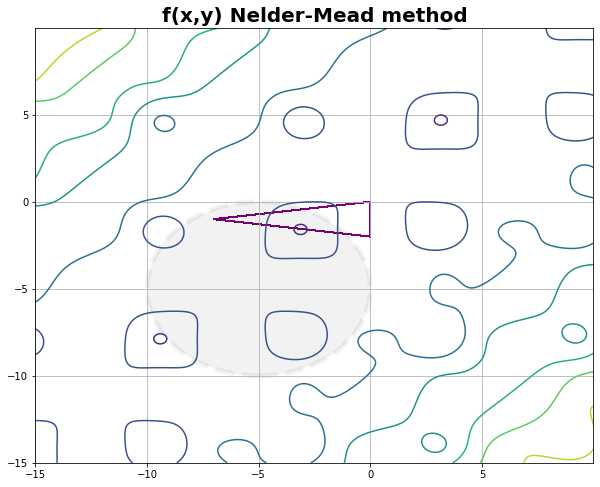

In [11]:
x0 = [[0, 0],
     [0 , -2],
     [-7, -1]] # initial condition inside the bounds

# Define gammas
alpha=1
beta=0.5
gamma=np.linspace(1,10,5)
# Define colors
colorSimplex=['blue','orange','green','red','purple']

# generate figure
fig, axis = plt.subplots(figsize=(10,8))
CS=axis.contour(X, Y, Zbird)
axis.set_title('f(x,y) Nelder-Mead method',fontweight='bold', fontsize=20)
plt.grid()

# Plot simplexes
simplexPts=np.array([x0[0], x0[1], x0[2]])
simplex=Polygon(simplexPts,facecolor='None',edgecolor=colorSimplex[0])
axis=plt.gca()
axis.add_patch(simplex)

for ii in range(len(gamma)):
    # Optimize
    xNM,iNM,kNM,errNM,fxlNM = nelderMead(x0, J, alpha, beta, gamma[ii],colorSimplex[ii])
    print('The convergence point $x^*=$=', xNM[-1], 'with a seed simplex of $x^0=$',x0,'for a \gamma=',gamma[ii])
# plot region of convergence
regionConv = plt.Circle((-5, -5), 5, color='k', fill=True, linestyle='--',alpha=0.05, linewidth=5)
axis.add_patch(regionConv)

### 4. Coordinate descend

In [12]:
def coordDesc(x0, f, alpha,tol):
    alphaArray=[]
    x = []
    parDevF=[]
    normDer=[]
    chgX=1e6
    n = len(x0) # dimension of x
    i=0 # initial direction of x
    k=0 # iteration/oracle calls
    
    normDer=[[1e6],[1e6]]
    maxIter=1e4 # max number of oracle calls
    
    while normDer[k][i] > tol and k < maxIter and chgX>tol:
        k=k+1 # increase oracle index
        
        ## STEP 1 pick direction
        if(i+1 == n):  # if you're in the last direction start again
            i=0
        else: # otherwise increase
            i=i+1
        ## STEP 2 Calculate \alpha
        # in this case we just fix it as a parameter but it could be calculated in a more sophisticaded way
#         alphaArray[k] = alpha
        ## STEP 3 Update x[k+1]
        # Calculate partial derivative in the chosen direction
        parDevF[k+1][i] = (f(x[k+1][i])-f(x[k][i]))/(x[k+1][i]-x[k][i]) # apprximate the derivative with an Euler forward
        normDer[k+1][i] = np.abs(parDevF) # norm of the derivative
#         x[k+1][i] = x[k][i] - alphaArray[k]*parDevF[k][i]
        x[k+1][i] = x[k][i] - alpha*parDevF[k][i]
        chgX=np.linalg.norm(x[k+1][i]-x[k][i])        
    return x, normDer, k;

In [13]:
# Seed
x0=[-5, 0]
xTrajectory,kCoorDesc = coordDesc(x0,J,alpha,tol)

IndexError: list index out of range

In [ ]:
normDer=[[1e6],[1e6]]
normDer[0][0]